<a href="https://colab.research.google.com/github/3B032013/2025_ML_hws/blob/main/hw4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 載入所需套件

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

# 一、資料預處理

1. 讀入 CIFAR-10 數據集

CIFAR-10 是一個小尺吋（32x32）彩色圖片資料集，其中，訓練集包含了 50000 張大小為 32x32 的彩色圖片；測試集包含了 10000 張大小為 32x32 的彩色圖片。CIFAR-10 的圖片資料可分為以下 10 個種類：

*   飛機 (airplane)
*   交通工具 (automobile)
*   鳥 (bird)
*   貓 (cat)
*   鹿 (deer)
*   狗 (dog)
*   青蛙 (frog)
*   馬 (horse)
*   船 (ship)
*   卡車 (truck)


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [ ]:
(x_test_image,y_test_label)= cifar10.load_data()

2. 資料整理

資料尺寸與通道數（Channel）

由於 CNN 模型的輸入資料必須是圖片，所以我們需要注意一張圖有多少個 channel。


因為CIFAR-10資料集的資料為彩色圖片，每一個像素點，其實包含了紅色（Red）、綠色（Green）以及藍色（Blue）三原色的強度，所以每一張圖有三個 channel，以及代表三種顏色的強度。

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
print(f"資料的最小值: {np.min(x_train)}")
print(f"資料的最大值: {np.max(x_train)}")

資料的最小值: 0
資料的最大值: 255


In [ ]:
print(f"資料的最小值: {np.min(x_test)}")
print(f"資料的最大值: {np.max(x_test)}")

資料的最小值: 0
資料的最大值: 255


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
# 資料類別標籤
labels_name = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

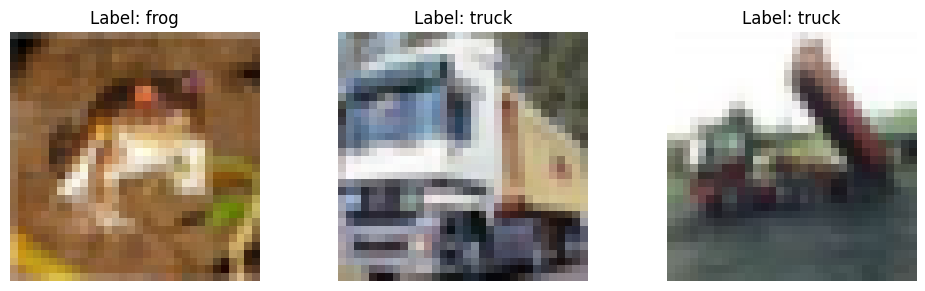

In [ ]:
# 顯示三張訓練資料(圖片)及其所對應的label名稱
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(x_train[i])
    label_index = np.argmax(y_train[i])  # 從 one-hot 還原 label 編號
    plt.title(f"Label: {labels_name[label_index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 二、建立神經網路模型

In [ ]:
model = Sequential()

In [ ]:
# 第一層：卷積層16個Filter，尺寸大小(3,3) 激活函數使用ReLU
model.add(Conv2D(16, (3, 3), padding='same',
        input_shape=(32, 32, 3),
        activation='relu'))

# 此層參數個數
# 公式是Filter尺寸*input通道數*Filter個數 再加上Filter個數
# 所以是 3*3*3*16 + 16
#　　　　=432+16
#    =448

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 第二層：卷積層16個Filter，尺寸大小(3,3) 激活函數使用ReLU
model.add(Conv2D(16, (3, 3), padding='same',
        activation='relu'))

# 此層參數個數
#  3*3*16*16 + 16
# =2304+16
# =2320

In [ ]:
# 第三層：池化層，池化尺寸(2,2)
model.add(MaxPool2D())

In [ ]:
# 第四層：卷積層32個Filter，尺寸大小(3,3) 激活函數使用ReLU
model.add(Conv2D(32, (3, 3), padding='same',
        activation='relu'))

# 此層參數個數
#  3*3*16*32 + 32
# =4608+32
# =4640

In [ ]:
# 第五層：卷積層32個Filter，尺寸大小(3,3) 激活函數使用ReLU
model.add(Conv2D(32, (3, 3), padding='same',
        activation='relu'))

# 此層參數個數
#  3*3*32*32 + 32
# =9216+32
# =9248

In [ ]:
# 第六層：池化層，池化尺寸(2,2)
model.add(MaxPool2D())

In [ ]:
# 第七層：拉平層
model.add(Flatten())

In [ ]:
# 第八層：全連接層：10個神經元，激活函數使用Softmax
model.add(Dense(10, activation='softmax'))

# 此層參數個數
# 公式是輸入神經元數*輸出神經元數 + 輸出神經元bias
#  2048*10 + 10
# =20480+10
# =20490

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,146 (145.10 KB)

 Trainable params: 37,146 (145.10 KB)

 Non-trainable params: 0 (0.00 B)

# 三、訓練神經網路

In [ ]:
# 設定損失函數
model.compile(loss='categorical_crossentropy',
      optimizer=Adam(learning_rate=0.001),
      metrics=['accuracy'])

In [ ]:
# 訓練資料中切出20%為驗證資料
train_history = model.fit(x_train, y_train, validation_split=0.2, batch_size=128, epochs=20)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.3096 - loss: 1.8921 - val_accuracy: 0.4794 - val_loss: 1.4509
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5079 - loss: 1.3871 - val_accuracy: 0.5662 - val_loss: 1.2290
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5811 - loss: 1.1791 - val_accuracy: 0.5975 - val_loss: 1.1300
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6363 - loss: 1.0512 - val_accuracy: 0.6232 - val_loss: 1.0716
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6657 - loss: 0.9656 - val_accuracy: 0.6298 - val_loss: 1.0613
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6797 - loss: 0.9195 - val_accuracy: 0.6602 - val_loss: 0.9762
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6996 - loss: 0.8647 - val_accuracy: 0.6784 - val_loss: 0.9240
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7139 - loss: 0.8234 - val_accuracy: 

# 四、以圖型顯示準確率(accuracy)與損失(loss)

In [ ]:
# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

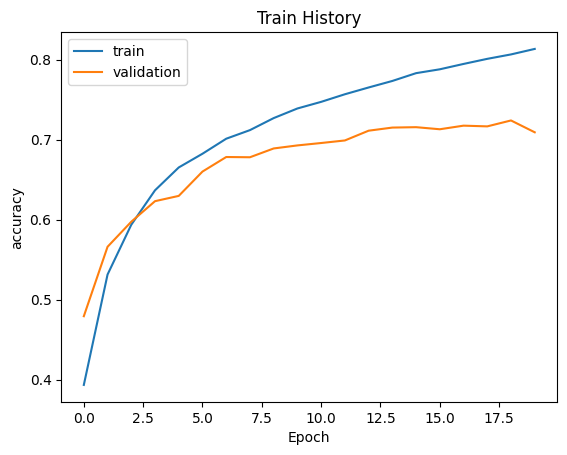

In [ ]:
# 準確率accuracy
show_train_history(train_history,'accuracy','val_accuracy')

# 從圖型可以看出有overfitting情形，訓練資料準確率持續上升但驗證資料卻表現不佳

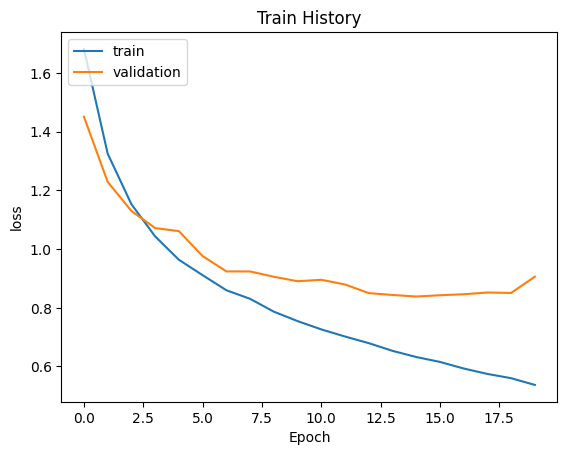

In [ ]:
# 損失誤差loss
show_train_history(train_history,'loss','val_loss')

# 五、評估模型準確率

In [ ]:
scores = model.evaluate(x_test, y_test)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7054 - loss: 0.9273

accuracy= 0.7081999778747559


# 六、進行預測

In [ ]:
# 一次呈現數張測試資料(圖片)、預測結果與真實結果
def plot_images_labels_prediction(images, labels_onehot, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25

    labels = np.argmax(labels_onehot, axis=1)     # 將 one-hot 轉成標籤
    pred_labels = np.argmax(prediction, axis=1)    # 預測結果轉成標籤

    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx])

        title = "label=" + str(labels_name[labels[idx]]) + "\n"
        title += "predict=" + str(labels_name[pred_labels[idx]])

        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


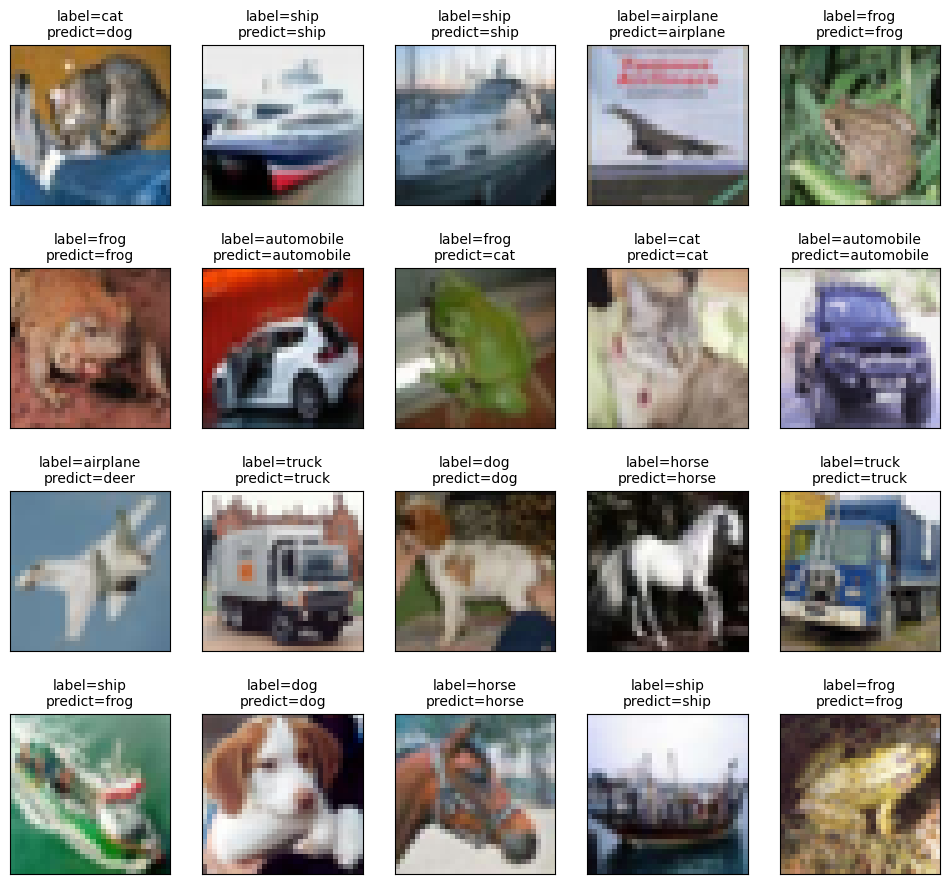

In [ ]:
prediction = model.predict(x_test)
plot_images_labels_prediction(x_test,y_test,prediction,idx=0,num=20)

# 七、confusion matrix (混淆矩陣)

In [ ]:
import pandas as pd

# 把 one-hot y_test 轉換為整數標籤
true_labels = np.argmax(y_test, axis=1)

# 將10000個預測結果一一轉換為
predicted_labels = np.argmax(prediction, axis=1)

# Now use predicted_labels in crosstab
pd.crosstab(true_labels, predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,630,12,131,38,26,9,15,14,75,50
1,14,800,13,18,5,9,12,9,28,92
2,30,1,648,68,89,61,60,28,8,7
3,10,5,98,537,82,181,45,29,7,6
4,8,3,93,49,708,39,44,46,9,1
5,6,1,69,143,64,652,12,49,2,2
6,1,4,78,76,61,22,748,7,2,1
7,8,3,45,33,96,67,4,740,1,3
8,47,29,30,22,12,5,9,6,813,27


# 八、儲存模型

In [ ]:
#儲存 model
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks'

model.save('hw4-1.keras')

# 九、 interact_manual

In [ ]:
y_predict = np.argmax(prediction, axis=1)
#from ipywidgets import interact_manual
def test(test):
  plt.imshow(x_test[test], cmap='Greys')
  print('神經網路判斷為：', str(labels_name[y_predict[test]]))

In [ ]:
#interact_manual(test, test=(0, 9999))

interactive(children=(IntSlider(value=4999, description='test', max=9999), Button(description='Run Interact', …

<function __main__.test(test)>